# MELBOURNE HOUSING PROJECT 

# I. Introduction

- The main target of the project is to apply linear regression model

- Specifically, the task is to predict housing prices in Melbourne

# II. Datasets description 

This data was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

https://www.kaggle.com/anthonypino/melbourne-housing-market

# III. Content

In [68]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

# modify the number of maximum displayed rows and columns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)


In [69]:
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [70]:
df2=df['Suburb']

In [71]:
df2.shape

(63023,)

In [72]:
df2 = df2.drop_duplicates()

In [73]:
df2.shape

(380,)

In [74]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [75]:
for i in df2.index:
    print(df2[i])
    df1=df.loc[df['Suburb'] == df2[i]]
    mean=df1['Price'].mean()
    print('mean cua ',df2[i],'la',mean)
    df1.Price.fillna(mean,inplace=True)
    for i in df.index:
        for j in df1.index:
            if i==j :
                df.loc[i]=df1.loc[j]
    print('Done replace')

Abbotsford
mean cua  Abbotsford la 1040200.7042253522


C:\Users\duong ngoc thien\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Done replace
Aberfeldie
mean cua  Aberfeldie la 1336363.1578947369
Done replace
Airport West
mean cua  Airport West la 761266.995145631
Done replace
Albanvale
mean cua  Albanvale la 504050.0
Done replace
Albert Park
mean cua  Albert Park la 1959777.34375
Done replace
Albion
mean cua  Albion la 619708.7777777778
Done replace
Alphington
mean cua  Alphington la 1371317.6470588236
Done replace
Altona
mean cua  Altona la 886714.4366197183
Done replace
Altona Meadows
mean cua  Altona Meadows la 631977.6119402985
Done replace
Altona North
mean cua  Altona North la 791730.9941520467
Done replace
Armadale
mean cua  Armadale la 1568722.7722772278
Done replace
Ascot Vale
mean cua  Ascot Vale la 1064158.466453674
Done replace
Ashburton
mean cua  Ashburton la 1651076.6666666667
Done replace
Ashwood
mean cua  Ashwood la 1171378.148148148
Done replace
Aspendale
mean cua  Aspendale la 1074908.3469387756
Done replace
Aspendale Gardens
mean cua  Aspendale Gardens la 866151.9607843137
Done replace
Attwoo

Done replace
Kensington
mean cua  Kensington la 859989.6363636364
Done replace
Kew
mean cua  Kew la 1722933.953488372
Done replace
Kew East
mean cua  Kew East la 1663251.7241379311
Done replace
Keysborough
mean cua  Keysborough la 800428.5714285715
Done replace
Kingsville
mean cua  Kingsville la 910670.6521739131
Done replace
Knoxfield
mean cua  Knoxfield la 856420.5813953489
Done replace
Kurunjang
mean cua  Kurunjang la 381785.71428571426
Done replace
Lalor
mean cua  Lalor la 613018.8552188552
Done replace
Lilydale
mean cua  Lilydale la 701562.5
Done replace
MacLeod
mean cua  MacLeod la 786818.4713375797
Done replace
Maidstone
mean cua  Maidstone la 701962.6175115207
Done replace
Malvern
mean cua  Malvern la 2055545.2229299364
Done replace
Malvern East
mean cua  Malvern East la 1590471.8407643312
Done replace
Maribyrnong
mean cua  Maribyrnong la 835949.3085501859
Done replace
McKinnon
mean cua  McKinnon la 1378233.3333333333
Done replace
Meadow Heights
mean cua  Meadow Heights la 4821

Done replace
Mickleham
mean cua  Mickleham la 975147.0588235294
Done replace
Mont Albert
mean cua  Mont Albert la 1474667.1923076923
Done replace
Montrose
mean cua  Montrose la 613600.0
Done replace
Oakleigh East
mean cua  Oakleigh East la 993970.0
Done replace
Princes Hill
mean cua  Princes Hill la 1642173.076923077
Done replace
Rockbank
mean cua  Rockbank la 597500.0
Done replace
Seabrook
mean cua  Seabrook la 624875.0
Done replace
Seaholme
mean cua  Seaholme la 1136339.2857142857
Done replace
Skye
mean cua  Skye la 527319.8
Done replace
Springvale South
mean cua  Springvale South la 710180.5555555555
Done replace
St Helena
mean cua  St Helena la 877250.0
Done replace
Sunbury
mean cua  Sunbury la 535590.1639344263
Done replace
Tarneit
mean cua  Tarneit la 529692.1296296297
Done replace
Taylors Hill
mean cua  Taylors Hill la 691297.5961538461
Done replace
Tecoma
mean cua  Tecoma la 647500.0
Done replace
The Basin
mean cua  The Basin la 638933.3333333334
Done replace
Vermont
mean cua  

In [76]:
df.head(20)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1.490000e+06,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1.220000e+06,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1.420000e+06,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1.515000e+06,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,6.700000e+05,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,5.300000e+05,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,5.400000e+05,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,7.150000e+05,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,5.040500e+05,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1.925000e+06,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


In [77]:
df.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price            11
Method            0
SellerG           0
Date              0
Postcode          0
Regionname        0
Propertycount     0
Distance          0
CouncilArea       0
dtype: int64

In [78]:
11/63023

0.00017453945385018167

### There are 11  missing values in the 'Price' target. In this case we will drop these missing values

In [79]:
df.drop(df[df.Price.isnull()].index,inplace=True)

In [80]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

# 1. Data visualization 

### feature ' Postcode' should be converted to categorical feature instead of numeric 
### feature 'Propertycount' accounts for the unique number of properties in that suburb, thus should be categorical

In [83]:
df.Postcode = df.Postcode.astype('object')
df.Propertycount = df.Propertycount.astype('object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63012 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63012 non-null  object 
 1   Address        63012 non-null  object 
 2   Rooms          63012 non-null  int64  
 3   Type           63012 non-null  object 
 4   Price          63012 non-null  float64
 5   Method         63012 non-null  object 
 6   SellerG        63012 non-null  object 
 7   Date           63012 non-null  object 
 8   Postcode       63012 non-null  object 
 9   Regionname     63012 non-null  object 
 10  Propertycount  63012 non-null  object 
 11  Distance       63012 non-null  float64
 12  CouncilArea    63012 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 6.7+ MB


### The data consists of 63023 rows and 13 columns.
### The predicted target is 'Price'. In conclusion, there are 12 feature: 2 numeric and 10 categorical

# 2. Feature selection

### numeric feature

In [85]:
df.drop(columns='Price').describe()

,Rooms,Distance
count,63012.000000,63012.000000
mean,3.110471,12.680083
std,0.957393,7.582224
min,1.000000,0.000000
25%,3.000000,7.000000
50%,3.000000,11.400000
75%,4.000000,16.700000
max,31.000000,55.800000


### correlation: there's no such large correlation among numeric features

In [86]:
np.number

numpy.number

In [87]:
df.select_dtypes(np.number).drop(columns='Price').corr()

,Rooms,Distance
Rooms,1.00000,0.26863
Distance,0.26863,1.00000


In [88]:
df.drop(columns='Price').describe(include='O')

,Suburb,Address,Type,Method,SellerG,Date,Postcode,Regionname,Propertycount,CouncilArea
count,63012,63012,63012,63012,63012,63012,63012,63012,63012,63012
unique,370,57743,3,9,476,112,221,8,359,34
top,Reservoir,56 Victoria St,h,S,Barry,24/03/2018,3073,Southern Metropolitan,21650,Boroondara City Council
freq,1241,7,45042,34063,6893,1144,1241,17559,1241,5132


### correlation: there is large correlation between 'Suburb' and 'Propertycount' feature                                               -> remove  'Propertycount' feature

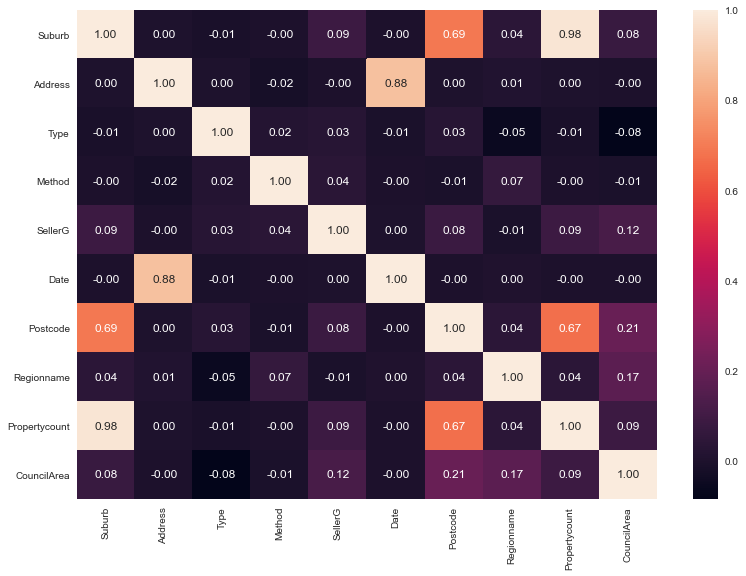

In [89]:
corr_cat = df.select_dtypes(object).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
plt.figure(figsize=(13,9))
sns.heatmap(corr_cat, xticklabels=corr_cat.columns.values, yticklabels=corr_cat.columns.values, annot=True, fmt=".2f")
plt.show()

# 3. Data transformation 

### - remove 'Address' and 'Propertycount' feature 
### - convert 'Date' from string -> Datetime, the convert to format Year-Month
### - drop all missing values (drop 11 rows)

In [90]:
new_df = df.copy()

#drop the address column
new_df = df.drop(columns=['Address','Propertycount'])

#convert from format dd-mm-yy to format yy-mm
new_df["Date"] = pd.to_datetime(new_df["Date"]).apply(lambda x: x.strftime('%Y-%m'))

#drop all missing values 
df2 = new_df.dropna()

In [91]:
new_df.isnull().sum()

Suburb         0
Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Date           0
Postcode       0
Regionname     0
Distance       0
CouncilArea    0
dtype: int64

### new data frame after modification

In [92]:
df2.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Distance,CouncilArea
0,Abbotsford,3,h,1490000.0,S,Jellis,2017-01,3067,Northern Metropolitan,3.0,Yarra City Council
1,Abbotsford,3,h,1220000.0,S,Marshall,2017-01,3067,Northern Metropolitan,3.0,Yarra City Council
2,Abbotsford,3,h,1420000.0,S,Nelson,2017-01,3067,Northern Metropolitan,3.0,Yarra City Council
3,Aberfeldie,3,h,1515000.0,S,Barry,2017-01,3040,Western Metropolitan,7.5,Moonee Valley City Council
4,Airport West,2,h,670000.0,S,Nelson,2017-01,3042,Western Metropolitan,10.4,Moonee Valley City Council


In [93]:
df2.describe(include='O')

,Suburb,Type,Method,SellerG,Date,Postcode,Regionname,CouncilArea
count,63012,63012,63012,63012,63012,63012,63012,63012
unique,370,3,9,476,35,221,8,34
top,Reservoir,h,S,Barry,2018-03,3073,Southern Metropolitan,Boroondara City Council
freq,1241,45042,34063,6893,3091,1241,17559,5132


# 4. Data visualization after transformation

### scatter plot of features regarding 'Price'

### Rooms

there is a sample, which might seem like an outlier (31 rooms, but price is low as well)

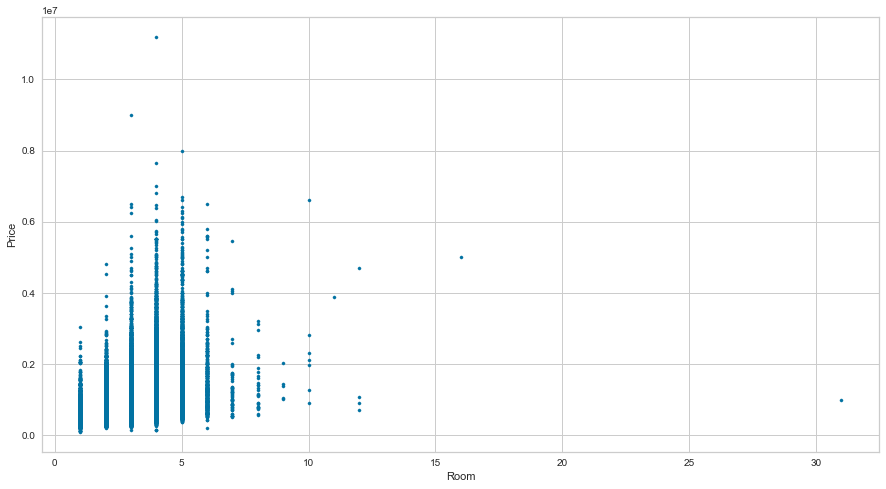

In [94]:
plt.figure(num=2, figsize=(15,8))

x = df2.sort_values(by='Date').Rooms
y = df2.sort_values(by='Date').Price

plt.xlabel('Room')
plt.ylabel('Price')

plt.scatter(x, y, s=10)
plt.show()

### Distance

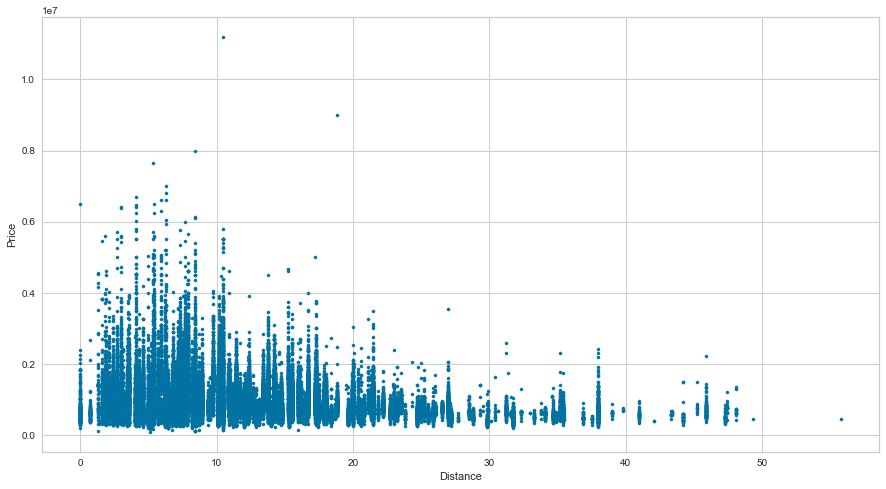

In [95]:
plt.figure(num=3, figsize=(15,8))

x = df2.sort_values(by='Date').Distance
y = df2.sort_values(by='Date').Price

plt.xlabel('Distance')
plt.ylabel('Price')

plt.scatter(x, y, s=10)
plt.show()

### Type

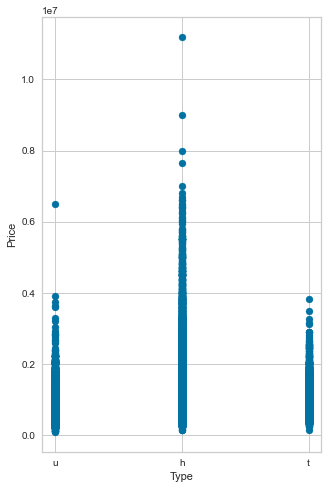

In [96]:
plt.figure(num=4, figsize=(5,8))

x = df2.sort_values(by='Date').Type.values
y = df2.sort_values(by='Date').Price.values

plt.xlabel('Type')
plt.ylabel('Price')

plt.scatter(x, y)
plt.show()

### Method 

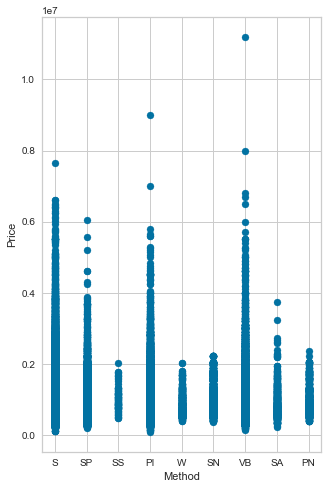

In [97]:
plt.figure(num=5, figsize=(5,8))

x = df2.sort_values(by='Date').Method.values
y = df2.sort_values(by='Date').Price.values

plt.xlabel('Method')
plt.ylabel('Price')

plt.scatter(x, y)
plt.show()

### Regionname

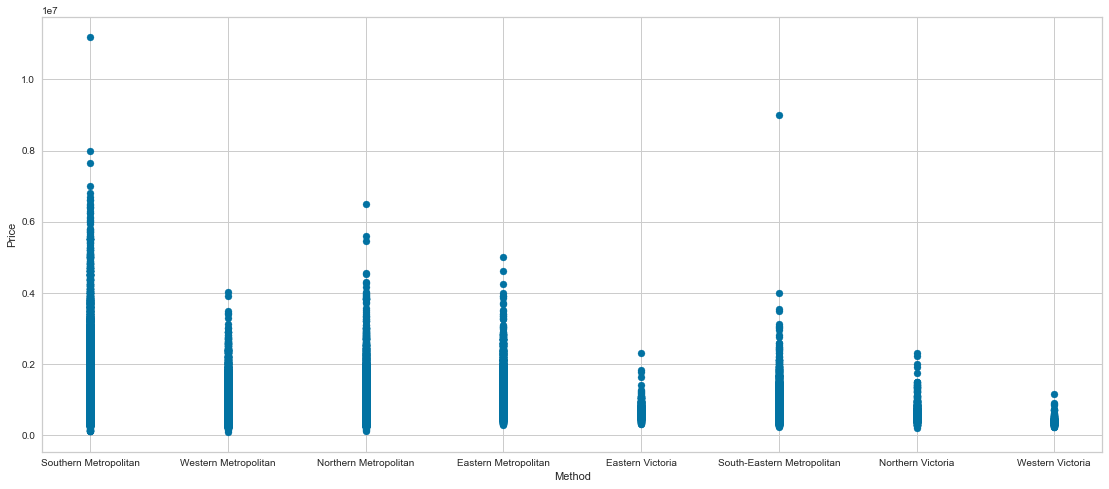

In [98]:
plt.figure(num=6, figsize=(19,8))

x = df2.sort_values(by='Date').Regionname.values
y = df2.sort_values(by='Date').Price.values

plt.xlabel('Method')
plt.ylabel('Price')

plt.scatter(x, y)
plt.show()

### Based on the graphs, the 'Price' values are densly scattered at value below 5 millions AUS
### The scattered values in the numerical-feature graphs look similar to each other

# 5. Data preprocessing, training and evaluating the model 

### using 5-fold cross validation

In [99]:
def KFold_score(X, y): 
    #create 5-fold object
    folds = KFold(n_splits=5, shuffle=True,random_state=0)
    
    score_test, score_train, rmse_train, rmse_test = [], [], [], []
   
    for train_index, test_index in folds.split(X, y):
        #split the data
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
        #create linear regression object
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        y_train_predict = model.predict(X_train)
        y_test_predict = model.predict(X_test)
        
        rmse_train.append(sqrt(mean_squared_error(y_train, y_train_predict)))
        rmse_test.append(sqrt(mean_squared_error(y_test, y_test_predict)))
        
        #predict X_test and calculate the accuracy based on the y_test, then compute the mean accuracy of 5 different sets
        score_train.append(model.score(X_train, y_train))
        score_test.append(model.score(X_test, y_test))
        
    print(f'Accuracy on the train set: {score_train} \nMean accuracy = {np.array(score_train).mean()}')
    print(f'RMSE= {np.array(rmse_train).mean()}')
    
    print(f'\nAccuracy on the test set: {score_test} \nMean accuracy = {np.array(score_test).mean()}')
    print(f'RMSE= {np.array(rmse_test).mean()}')

### train model 

In [100]:
feature = df2.drop(columns='Price')
target = df2['Price']

### Without PCA

In [101]:
ohe_feature = pd.get_dummies(feature)
scaler = MinMaxScaler(feature_range=(0,1)).fit_transform(ohe_feature)

# feature
X = scaler

# target
y = target.values.reshape(-1,1)

In [102]:
X.shape

(63012, 1158)

In [103]:
KFold_score(X, y)

Accuracy on the train set: [0.6388078263125843, 0.6481917287323693, 0.6422378789352701, 0.6418338042490387, 0.6440550415607367] 
Mean accuracy = 0.6430252559579998
RMSE= 332504.3320711455

Accuracy on the test set: [-6.307458592800659e+21, -1.0888125296786131e+21, -1.314027172126354e+22, -2.721001541572969e+20, -3.7343498861436197e+21] 
Mean accuracy = -4.908598576808747e+21
RMSE= 3.3863057020771276e+16


### The model is predicting very well on the training set (mean accuracy 64,3%) but is predicting very badly on the test set. Thus the model is overfitting.

### With PCA

In [104]:
ohe_feature1 = pd.get_dummies(feature)
scaler1 = MinMaxScaler(feature_range=(0,1)).fit_transform(ohe_feature1)

pca = PCA(n_components=550)
# feature
X1 = pca.fit_transform(scaler1)

# target
y1 = target.values.reshape(-1,1)

In [105]:
X1.shape

(63012, 550)

In [106]:
KFold_score(X1, y1)

Accuracy on the train set: [0.6384506143570845, 0.6464806318550471, 0.6409054936478819, 0.6414040171258968, 0.645317073827752] 
Mean accuracy = 0.6425115661627325
RMSE= 332744.8444522246

Accuracy on the test set: [0.6514354404781191, 0.6186768444374882, 0.640280093596767, 0.6396193668763557, 0.6248059539738201] 
Mean accuracy = 0.63496353987251
RMSE= 336209.2277713694


### The model when applying PCA is doing much better on the test set whilst the train set. 

## Residual Plot 

### plotting 5 different residual plots based on 5 different CV sets 

In [109]:
from yellowbrick.regressor import ResidualsPlot
def residual(X, y):    
    folds = KFold(n_splits=5, shuffle=True,random_state=0)

    for train_index, test_index in folds.split(X, y):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

        model = ResidualsPlot(LinearRegression())
        model.fit(X_train, y_train)
        model.score(X_test, y_test)
        model.show()

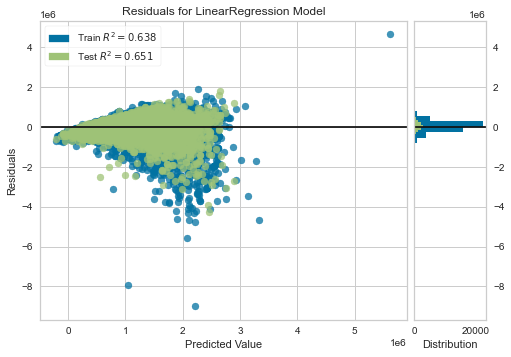

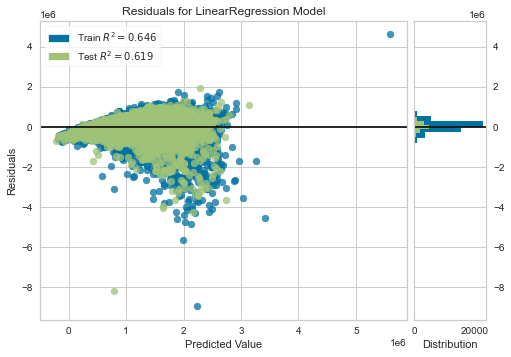

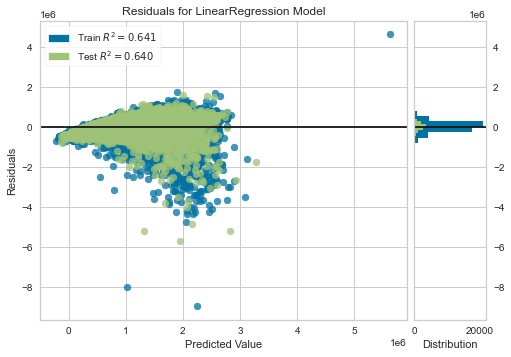

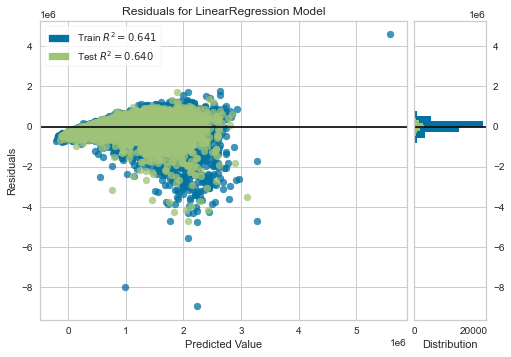

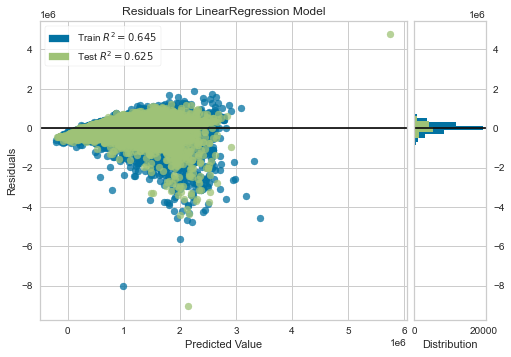

In [110]:
residual(X1, y1)

### Heteroskedasticity

## 5. Conclusion 

There too many categorical features, in which there are too many unique values as well, that causes overfitting. 
There too many samples as compared to the number of features, which might cause underfitting. 

### PCA considerably resolves overfitting:

### Without PCA 

Accuracy on the train set: 
Mean accuracy = 0.6430252559579998
RMSE= 332504.3320711455

Accuracy on the test set: 
Mean accuracy = -4.908598576808747e+21
RMSE= 3.3863057020771276e+16

### With PCA

Accuracy on the train set: 
Mean accuracy = 0.6425115661627325
RMSE= 332744.8444522246

Accuracy on the test set: 
Mean accuracy = 0.63496353987251
RMSE= 336209.2277713694